## US Airline Performance and Delay report
#### Performance of flights
The goal of the project is to analyze the performance of the reporting airline to improve flight reliability thereby improving customer reliability.

Below are the key report items,

* Yearly airline performance report 
* Yearly average flight delay statistics

*NOTE:* The year range is between 2005 and 2020.

#### Components of the report items
1. Yearly airline performance report

For the chosen year provide,

 * Number of flights under different cancellation categories using bar chart.
* Average flight time by reporting airline using line chart.
* Percentage of diverted airport landings per reporting airline using pie chart.
* Number of flights flying from each state using choropleth map.
* Number of flights flying to each state from each reporting airline using treemap chart.

2. Yearly average flight delay statistics

For the chosen year provide,

* Monthly average carrier delay by reporting airline for the given year.
* Monthly average weather delay by reporting airline for the given year.
* Monthly average national air system delay by reporting airline for the given year.
* Monthly average security delay by reporting airline for the given year.
* Monthly average late aircraft delay by reporting airline for the given year.

### Requirements to create the expected result
* Two dropdowns : For choosing report type and year
* Each dropdown will be designed as follows:
    * An outer division with two inner divisions
    * One of the inner divisions will have information about the dropdown and the other one is dropdown.
* Layout for adding graphs.
* Callback function to compute data, create graph and return to the layout.

In [1]:
# Import required libraries
import pandas as pd
import dash
import dash_html_components as html
from dash import dcc
from dash.dependencies import Input, Output, State
import plotly.graph_objects as go
import plotly.express as px
from dash import no_update


C:\Users\admin\AppData\Local\Temp\ipykernel_11900\4107956086.py:4: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


#### Creating a dash application

In [2]:
# Create a dash application
app = dash.Dash(__name__)

# Clear the layout and do not display exception till callback gets executed
app.config.suppress_callback_exceptions = True

#### Import the data
Now, read the data from a url to a pandas dataframe.

_Data credit: IBM Developer Skills Network_

In [3]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/airline_data.csv"

# Read the airline data into pandas dataframe
airline_data =  pd.read_csv(url, encoding = "ISO-8859-1", 
                            dtype={'Div1Airport': str, 'Div1TailNum': str, 
                                   'Div2Airport': str, 'Div2TailNum': str})

# verify if the data is loaded correctly
airline_data.head(5)

,Unnamed: 0,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,...,Div4WheelsOff,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum
0,1295781,1998,2,4,2,4,1998-04-02,AS,19930,AS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1125375,2013,2,5,13,1,2013-05-13,EV,20366,EV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,118824,1993,3,9,25,6,1993-09-25,UA,19977,UA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,634825,1994,4,11,12,6,1994-11-12,HP,19991,HP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1888125,2017,3,8,17,4,2017-08-17,UA,19977,UA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Compute graph data for creating yearly airline performance report 

Defining a function to calculate the graph data later used for plotting with

Argument:
     
    df: Filtered dataframe
    
Returns:
   Dataframes to create graph. 

In [4]:
# List of years 
year_list = [i for i in range(2005, 2021, 1)]

# The function
def compute_data_choice_1(df):
    # Cancellation Category Count
    bar_data = df.groupby(['Month','CancellationCode'])['Flights'].sum().reset_index()
    # Average flight time by reporting airline
    line_data = df.groupby(['Month','Reporting_Airline'])['AirTime'].mean().reset_index()
    # Diverted Airport Landings
    div_data = df[df['DivAirportLandings'] != 0.0]
    # Source state count
    map_data = df.groupby(['OriginState'])['Flights'].sum().reset_index()
    # Destination state count
    tree_data = df.groupby(['DestState', 'Reporting_Airline'])['Flights'].sum().reset_index()
    return bar_data, line_data, div_data, map_data, tree_data


#### Compute graph data for creating yearly airline delay report

This function will take in airline data and selected year as an input and perform computation for creating charts and plots.

Arguments:

    df: Input airline data.
    
Returns:
    
    Computed average dataframes for carrier delay, weather delay, NAS delay, security delay, and late aircraft delay.

In [5]:
def compute_data_choice_2(df):
    # Compute delay averages
    avg_car = df.groupby(['Month','Reporting_Airline'])['CarrierDelay'].mean().reset_index()
    avg_weather = df.groupby(['Month','Reporting_Airline'])['WeatherDelay'].mean().reset_index()
    avg_NAS = df.groupby(['Month','Reporting_Airline'])['NASDelay'].mean().reset_index()
    avg_sec = df.groupby(['Month','Reporting_Airline'])['SecurityDelay'].mean().reset_index()
    avg_late = df.groupby(['Month','Reporting_Airline'])['LateAircraftDelay'].mean().reset_index()
    return avg_car, avg_weather, avg_NAS, avg_sec, avg_late

### Application Layout

App layout is created based on the requirements mentioned above.
It will contain Title of the Dashboard, the dropdowns and their positions, graph output positions


In [6]:
# Application layout
app.layout = html.Div(children=[ 
                                # Title of the dashboard
                                html.H1("US Domestic Airline Flights Perfomance",
                                        style={'textAlign':'center', 'color' : '#503D36', 'font-size': 24}),

                                # Dropdown creation
                                # Outer division
                                html.Div([
                                    # Add a division 
                                    html.Div([
                                        # Division for adding dropdown helper text for report type
                                        html.Div(
                                            [
                                            html.H2('Report Type:', style={'margin-right': '2em'}),
                                            ]
                                        ),
                                        
                                        # Add a dropdown
                                        dcc.Dropdown(id="input-type",
                                                     options=[
                                                        {'label':'Yearly Airline Performance Report','value':'OPT1'},   
                                                        {'label':'Yearly Airline Delay Report','value':'OPT2'}
                                                    # "OPY1" and "OPT2" are the references for the two options mentioned in 'label' key
                                                     ],
                                                     placeholder="Select a report Type",
                                                     style={'width':'80%', 'font-size':'20px', 'padding':'3px', 'text-align-last':'center',}
                                                    ),
                                    # Place them next to each other using the division style
                                    ], style={'display':'flex'}),
                                    
                                   # Add next division 
                                   html.Div([
                                       # Division for adding dropdown helper text for choosing year
                                        html.Div(
                                            [
                                            html.H2('Choose Year:', style={'margin-right': '2em'})
                                            ]
                                        ),
                                        
                                       dcc.Dropdown(id='input-year', 
                                                     # Update dropdown values using list comphrehension
                                                     options=[{'label': i, 'value': i} for i in year_list],   # Each year is its value and label
                                                     placeholder="Select a year",                             # Display text for no selection
                                                     style={'width':'80%', 'padding':'3px', 'font-size': '20px', 'text-align-last' : 'center'}),
                                            # Place them next to each other using the division style
                                            ], style={'display': 'flex'}),  
                                          ]),
                                
                                # Add Computed graphs
                                # We add an empty division and provide an id that will be updated during callback
                                html.Div([ ], id='plot1'),
    
                                html.Div([
                                        html.Div([ ], id='plot2'),
                                        html.Div([ ], id='plot3')
                                ], style={'display': 'flex'}),
                                
                                # Add a division with two empty divisions inside for two plots.
                                html.Div([
                                    html.Div([ ],id='plot4'),
                                    html.Div([ ],id='plot5')
                                ],
                                style={'display':'flex'}
                                ),

                                ])

### Callback and Outputs

Here we will create the app callback. It will designate the input to the app and the outputs to be given. 

In [7]:
# Callback function definition
# Add 5 ouput components for the 5 plots

@app.callback( [
    Output(component_id='plot1', component_property='children'),
    Output(component_id='plot2', component_property='children'),
    Output(component_id='plot3', component_property='children'),
    Output(component_id='plot4', component_property='children'),
    Output(component_id='plot5', component_property='children')
],
    [Input(component_id='input-type', component_property='value'),
     Input(component_id='input-year', component_property='value')],
    
    # Holding output state till user enters all the form information. In this case, it will be chart type and year
    [State("plot1", 'children'), State("plot2", "children"),
     State("plot3", "children"), State("plot4", "children"),
     State("plot5", "children")
    ])


# Add computation to callback function and return graph
def get_graph(chart, year, children1, children2, c3, c4, c5):
      
    # Select data for the intended years
    df =  airline_data[airline_data['Year']==int(year)]
    
    if chart == 'OPT1':                        ## OPT1 referes to 'Yearly Airline Performance Report'
        # Compute required information for creating graph from the data
        bar_data, line_data, div_data, map_data, tree_data = compute_data_choice_1(df)
        
        # Number of flights under different cancellation categories
        bar_fig = px.bar(bar_data, x='Month', y='Flights', color='CancellationCode', title='Monthly Flight Cancellation')
        
        # Average flight time by reporting airline
        line_fig = px.line(line_data, x='Month', y='AirTime', color='Reporting_Airline',
                            title='Average monthly flight time (minutes) by airline')
        
        # Percentage of diverted airport landings per reporting airline
        pie_fig = px.pie(div_data, values='Flights', names='Reporting_Airline', title='% of flights by reporting airline')
        
        # Number of flights flying from each state using choropleth
        map_fig = px.choropleth(map_data, locations='OriginState', 
                                color='Flights',  hover_data=['OriginState', 'Flights'], 
                                locationmode = 'USA-states',              # Set to plot as US States
                                color_continuous_scale='GnBu',            # Color code Green-Blue
                                range_color=[0, map_data['Flights'].max()])   # Set the color hue range
        map_fig.update_layout(
                title_text = 'Number of flights from origin state', 
                geo_scope='usa')             # Plot only the USA instead of globe
        
        # Number of flights flying to each state from each reporting airline
        tree_fig = px.treemap(tree_data, path=['DestState', 'Reporting_Airline'], 
                            values='Flights', 
                            color='Flights', 
                            color_continuous_scale='RdBu',
                            title='Flight count by airline to destination state'
                            )
            
        # Return dcc.Graph component to the empty division
        return [dcc.Graph(figure=tree_fig), 
                dcc.Graph(figure=pie_fig),
                dcc.Graph(figure=map_fig),
                dcc.Graph(figure=bar_fig),
                dcc.Graph(figure=line_fig)
                ]
    else:
            # This covers chart type 2 
            # Compute required information for creating graph from the data
        avg_car, avg_weather, avg_NAS, avg_sec, avg_late = compute_data_choice_2(df)
            
        # Create graphs
        carrier_fig = px.line(avg_car, x='Month', y='CarrierDelay', color='Reporting_Airline', title='Average carrrier delay time (minutes) by airline')
        weather_fig = px.line(avg_weather, x='Month', y='WeatherDelay', color='Reporting_Airline', title='Average weather delay time (minutes) by airline')
        nas_fig = px.line(avg_NAS, x='Month', y='NASDelay', color='Reporting_Airline', title='Average NAS delay time (minutes) by airline')
        sec_fig = px.line(avg_sec, x='Month', y='SecurityDelay', color='Reporting_Airline', title='Average security delay time (minutes) by airline')
        late_fig = px.line(avg_late, x='Month', y='LateAircraftDelay', color='Reporting_Airline', title='Average late aircraft delay time (minutes) by airline')
        
        # return the dcc.Graph components as above
        return[ dcc.Graph(figure=carrier_fig), 
                dcc.Graph(figure=weather_fig), 
                dcc.Graph(figure=nas_fig), 
                dcc.Graph(figure=sec_fig), 
                dcc.Graph(figure=late_fig)]


### Ready to go!

Our app is now created and filled every data we need except for us running it of course.
One executed the code will give a link, click on the link to visit the stand-alone app dashboard. 

Make sure you give it some time to process the things :)



In [ ]:
# Run the app
if __name__ == '__main__':
    app.run_server()

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:8050
Press CTRL+C to quit
127.0.0.1 - - [23/Jun/2023 15:36:28] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [23/Jun/2023 15:36:28] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [23/Jun/2023 15:36:28] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [23/Jun/2023 15:36:28] "GET /_favicon.ico?v=2.7.0 HTTP/1.1" 200 -
127.0.0.1 - - [23/Jun/2023 15:36:28] "GET /_dash-component-suites/dash/dcc/async-dropdown.js HTTP/1.1" 304 -


Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\lib\site-packages\flask\app.py", line 2525, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\ProgramData\anaconda3\lib\site-packages\flask\app.py", line 1822, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\ProgramData\anaconda3\lib\site-packages\flask\app.py", line 1820, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\ProgramData\anaconda3\lib\site-packages\flask\app.py", line 1796, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**view_args)
  File "C:\ProgramData\anaconda3\lib\site-packages\dash\dash.py", line 1274, in dispatch
    ctx.run(
  File "C:\ProgramData\anaconda3\lib\site-packages\dash\_callback.py", line 440, in add_context
    output_value = func(*func_args, **func_kwargs)  # %% callback invoked %%
  File "C:\Users\admin\AppData\Local\Temp\ipykernel_11900\35951

127.0.0.1 - - [23/Jun/2023 15:36:28] "POST /_dash-update-component HTTP/1.1" 500 -


Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\lib\site-packages\flask\app.py", line 2525, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\ProgramData\anaconda3\lib\site-packages\flask\app.py", line 1822, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\ProgramData\anaconda3\lib\site-packages\flask\app.py", line 1820, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\ProgramData\anaconda3\lib\site-packages\flask\app.py", line 1796, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**view_args)
  File "C:\ProgramData\anaconda3\lib\site-packages\dash\dash.py", line 1274, in dispatch
    ctx.run(
  File "C:\ProgramData\anaconda3\lib\site-packages\dash\_callback.py", line 440, in add_context
    output_value = func(*func_args, **func_kwargs)  # %% callback invoked %%
  File "C:\Users\admin\AppData\Local\Temp\ipykernel_11900\35951

127.0.0.1 - - [23/Jun/2023 15:36:36] "POST /_dash-update-component HTTP/1.1" 500 -
127.0.0.1 - - [23/Jun/2023 15:36:54] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [23/Jun/2023 15:36:54] "GET /_dash-component-suites/dash/dcc/async-graph.js HTTP/1.1" 200 -
127.0.0.1 - - [23/Jun/2023 15:36:54] "GET /_dash-component-suites/dash/dcc/async-plotlyjs.js HTTP/1.1" 200 -


_NOTE:_ In the Kernel you can press `Ctrl + C` to stop the app.

## Outputs

I am attaching some of the outputs here to verify. You can always run the app and cross check.

### Airline Delay Report Data 2006
---------------------------
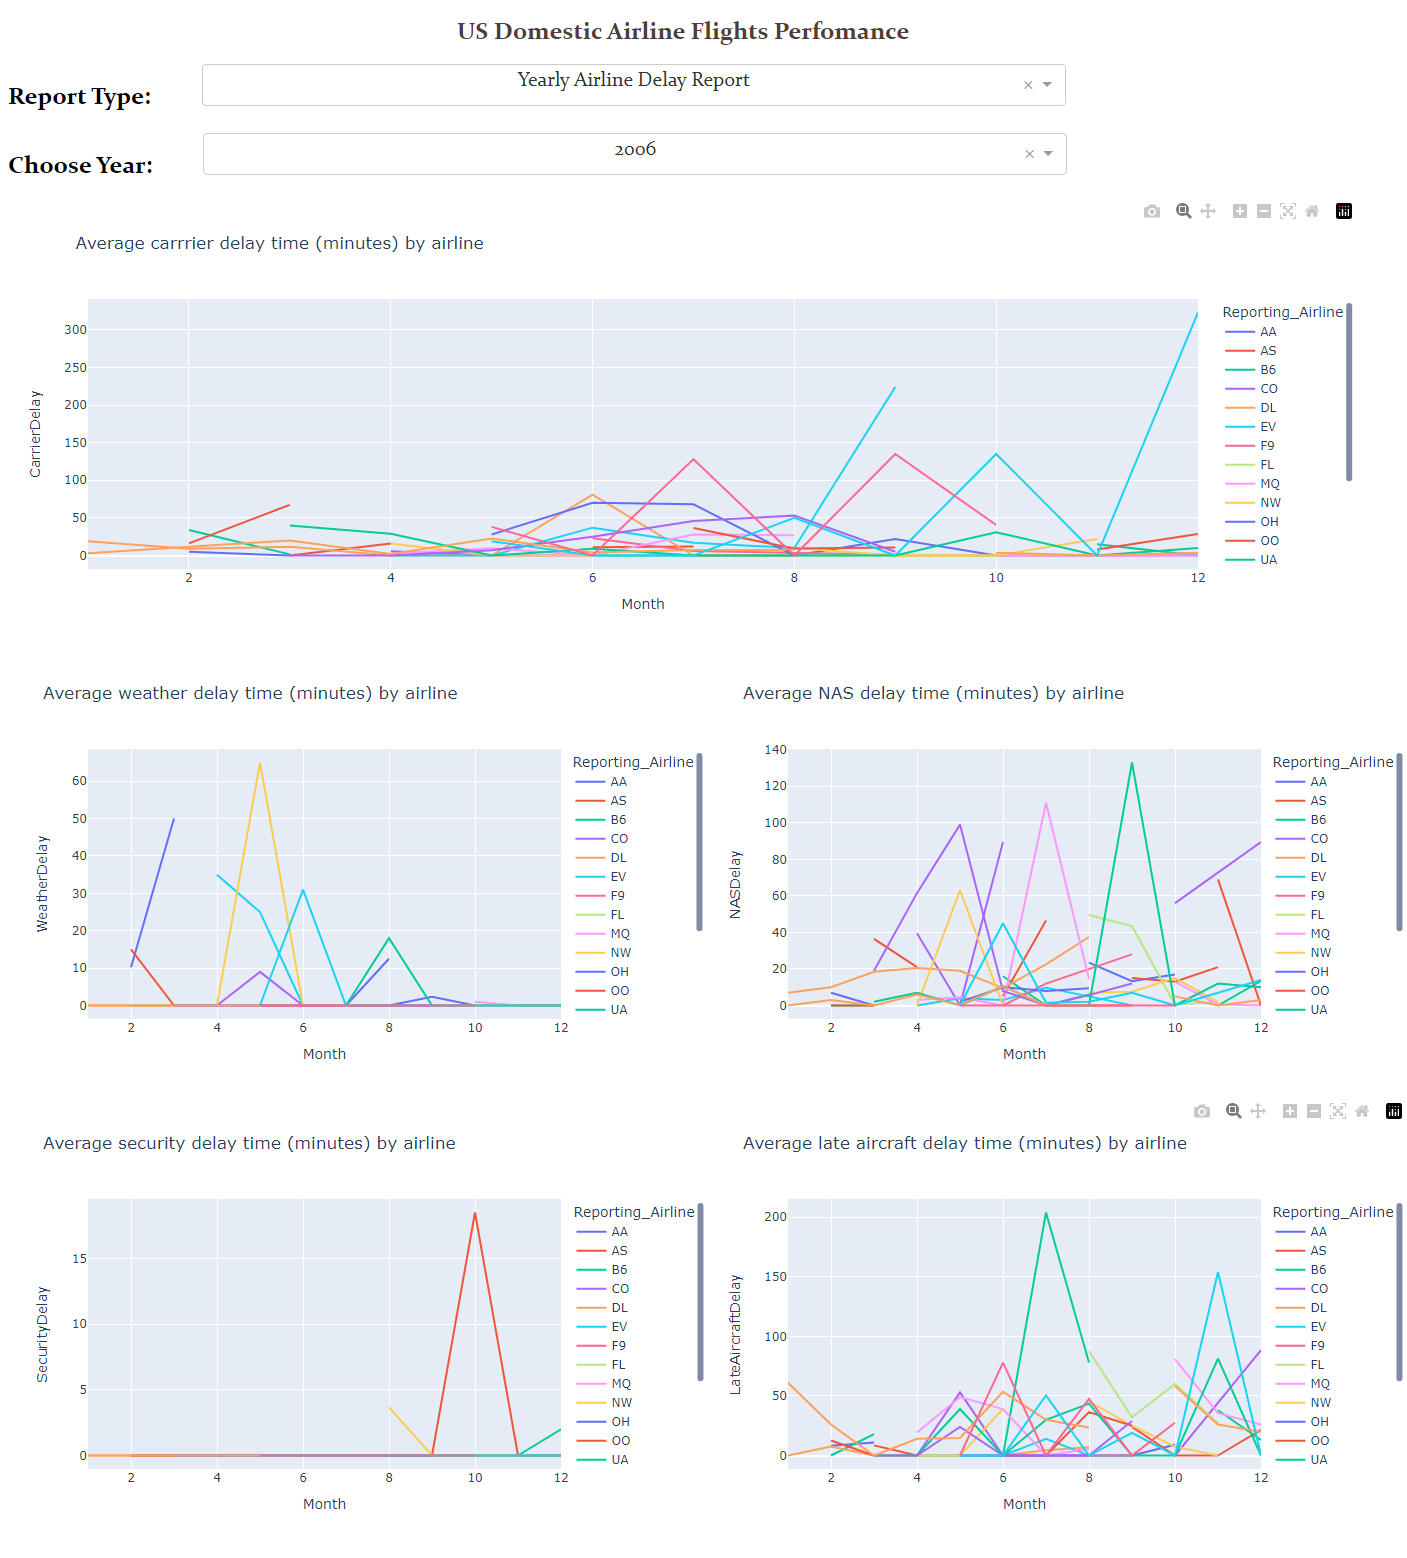

### Airline Performance Report 2006
--------
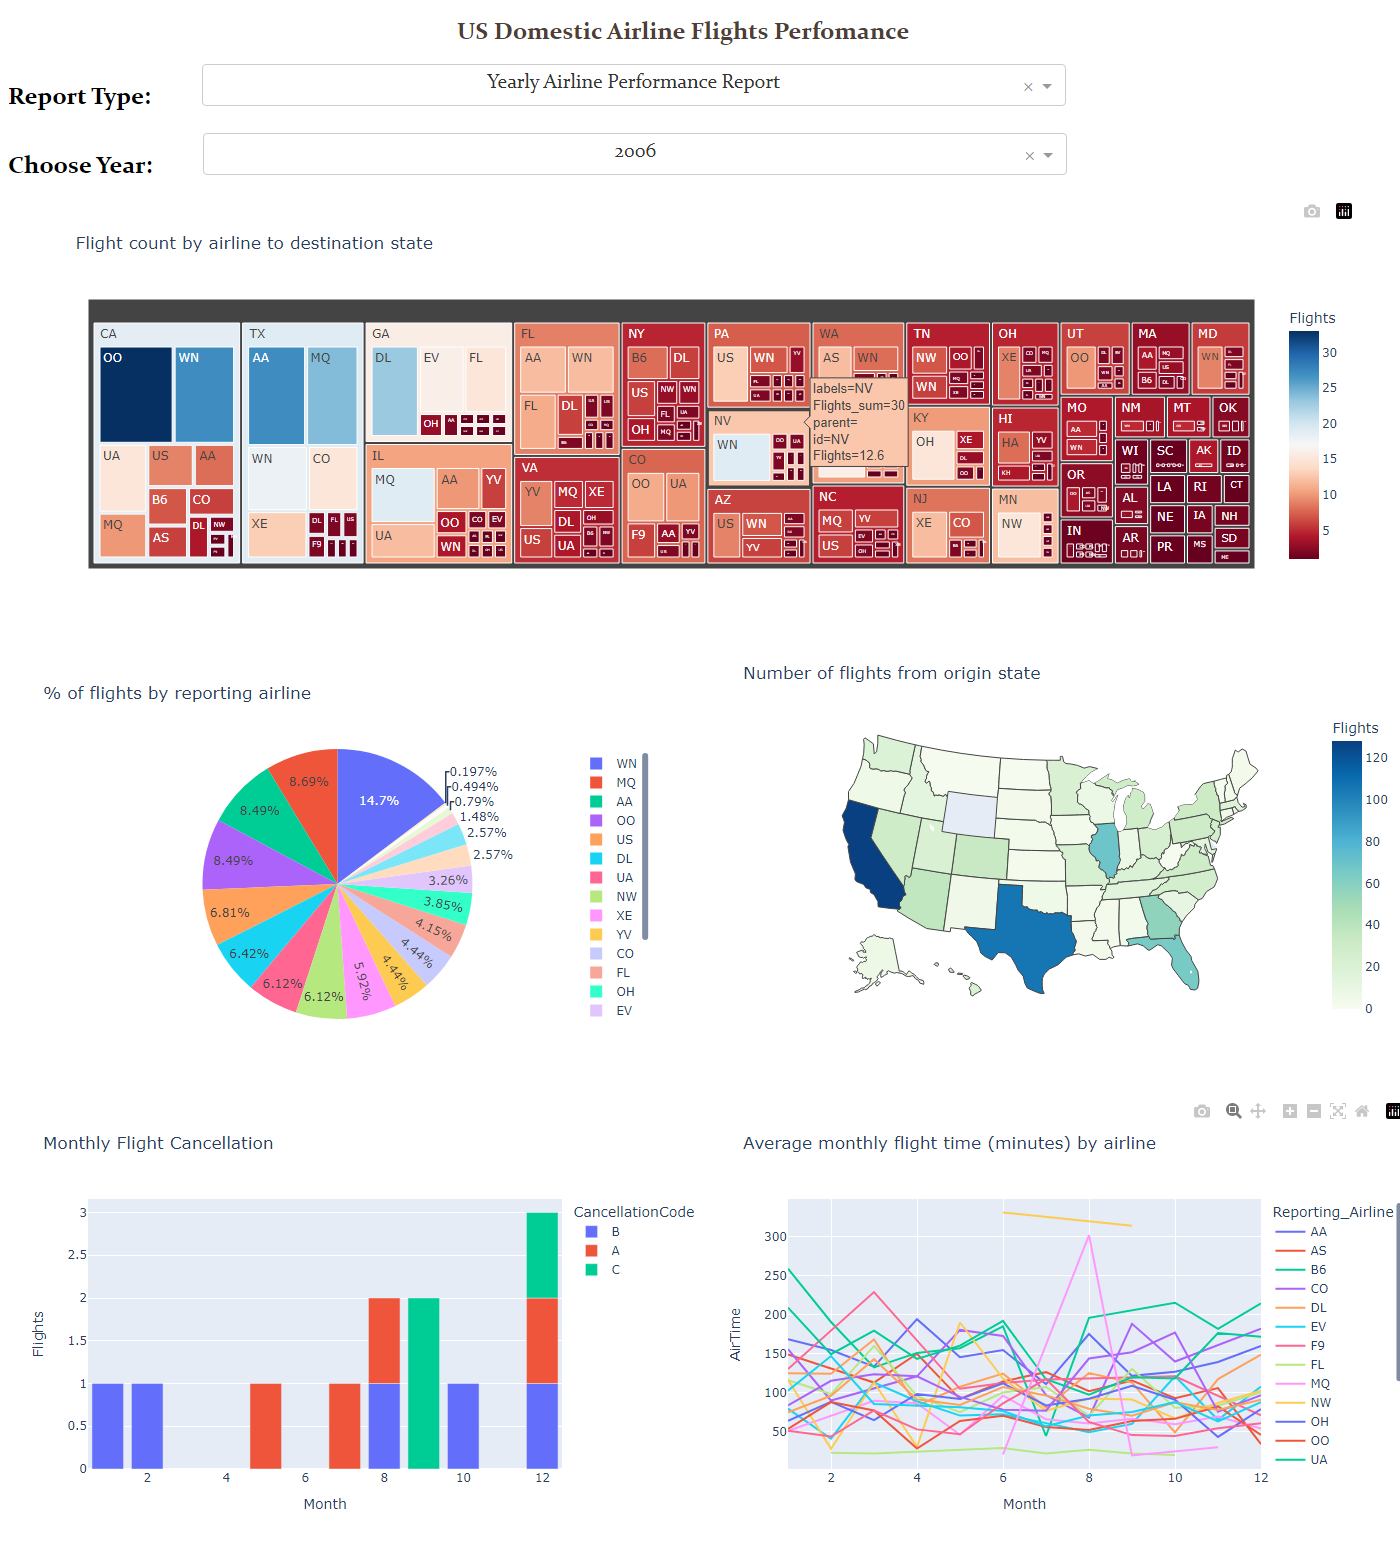

### That will be all.
# Thank You.
__Abhinav Dubey__